<a href="https://colab.research.google.com/github/simrran-sharma/MSC-IT-PART1-SEM1/blob/main/FDS/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision trees**

Decision trees are supervised models that can either preform regression or
classification.

**How does a computer build a regression tree?**

Modern decision tree algorithms tend to use a recursive binary splitting approach:
1. The process begins at the top of the tree.
2. For every feature, it will examine every possible split, and choose the feature
and split such that the resulting tree has the lowest possible mean squared
error (MSE). The algorithm makes that split.
3. It will then examine the two resulting regions, and again make a single split
(in one of the regions) to minimize the MSE.
4. Keep repeating step 3 until a stopping criterion is met:
° Maximum tree depth (maximum number of splits required to arrive
at a leaf)
° Minimum number of observations in a leaf (final) node

**How does a computer fit a classification tree?**

Similarly to a regression tree, a classification tree is built by optimizing over a metric(in this case, the gini index) and choosing the best split to make this optimization.
More formally, at each node the tree will take the following steps:
1. Calculate the purity of the data.
2. Select a candidate split.
3. Calculate the purity of the data after the split.
4. Repeat for all variables.
5. Choose the variable with the greatest increase in purity.
6. Repeat for each split until some stop criteria is met.


 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


In [ ]:
import pandas as pd
titanic = pd.read_csv('Titanic.csv')
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})
titanic.Age.fillna(titanic.Age.median(), inplace=True)
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1,
inplace=True)
titanic = pd.concat([titanic, embarked_dummies], axis=1)
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived
X.head()

,Pclass,Sex,Age,Embarked_Q,Embarked_S
0,3,1,22.0,0,1
1,1,0,38.0,0,0
2,3,0,26.0,0,1
3,1,0,35.0,0,1
4,3,1,35.0,0,1


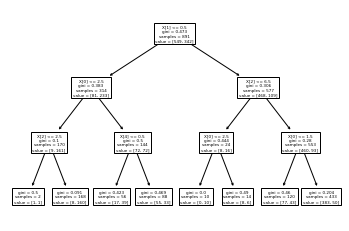

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)
tree.plot_tree(treeclf);

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258


In [ ]:
import numpy as np
red_point1 = np.array([1, 3])
red_point2 = np.array([2, 5])
red_point3 = np.array([3, 4])
red_center = (red_point1 + red_point2 + red_point3) / 3.
red_center
# array([ 2., 4.])

array([2., 4.])